### Jiyoung Hwang
#### Homework1

In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [16]:
data = pd.read_csv("C:/Users/hjygo/Downloads/TaylorRuleData.csv", index_col = 0)

In [17]:
data.index = pd.to_datetime(data.index)

In [18]:
data.isna().sum()

FedFunds          90
Unemployment      12
HousingStarts    145
Inflation          1
dtype: int64

In [22]:
data = data.dropna()

In [24]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [25]:
split_1 = int(len(data)*0.6)
split_2 = int(len(data)*0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [26]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,0]
y_hold = data_hold.iloc[:,0]

In [27]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold =sm.add_constant(X_hold)  

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [46]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [47]:
import matplotlib.pyplot as plt

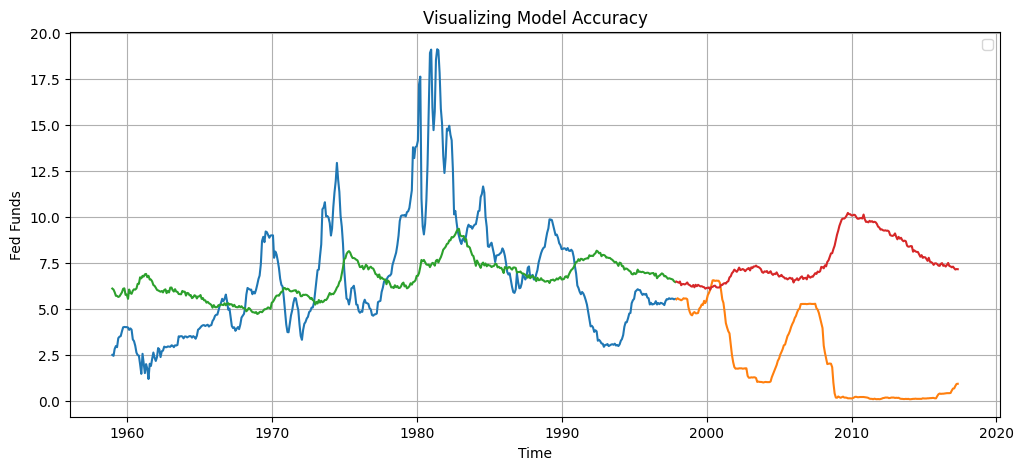

In [51]:
plt.figure(figsize = (12,5))

###

plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [34]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
max_degrees = 3

DEGREE :  1


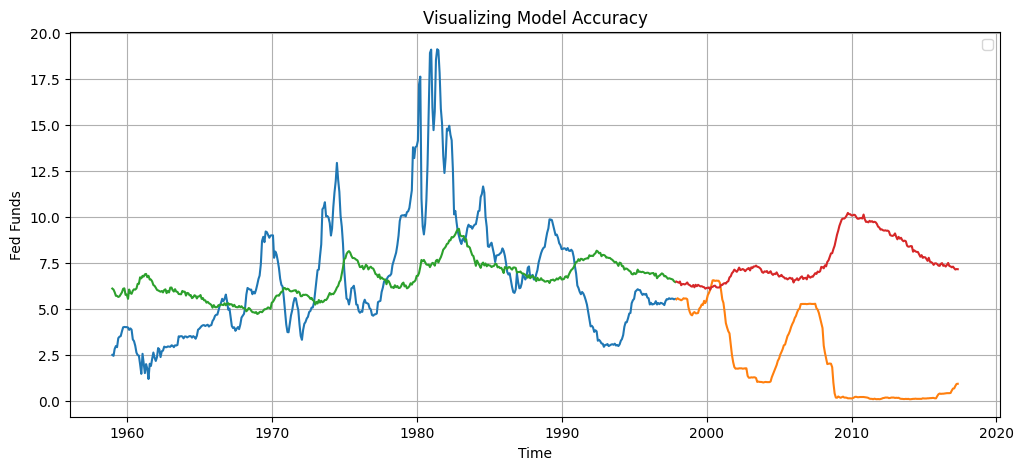

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566782
DEGREE :  2


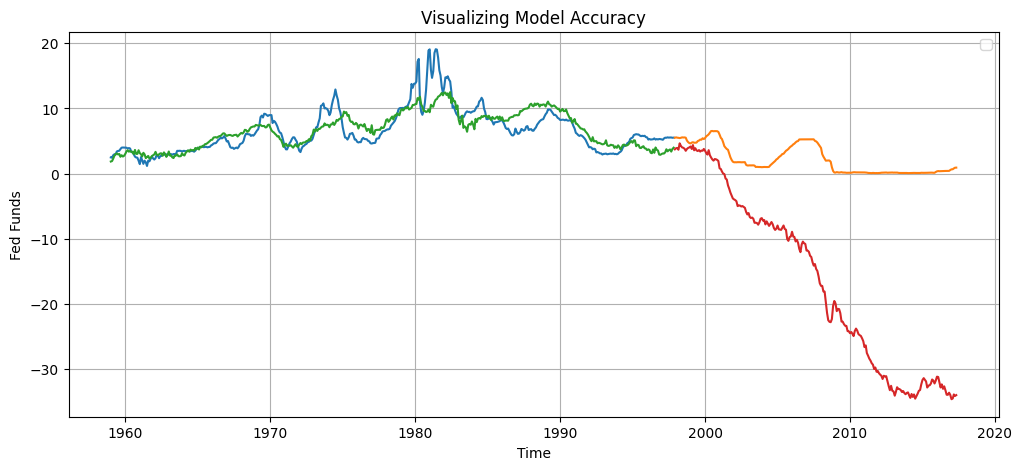

Insample MSE :  3.8634771392760685
Outsample MSE :  481.4465099294859
DEGREE :  3


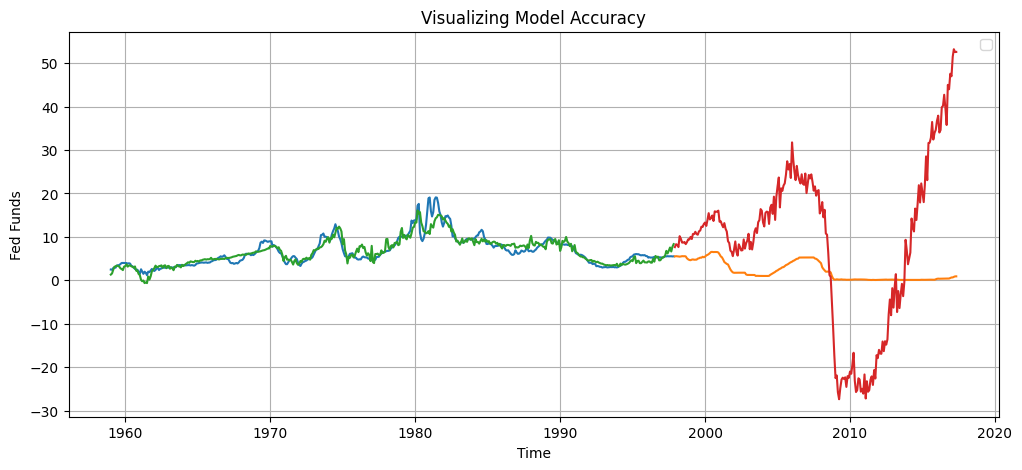

Insample MSE :  1.8723636270105195
Outsample MSE :  371.76836621375037


In [57]:
for degrees in range(1, max_degrees+1):
    print("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)

    model2 = sm.OLS(y_in, X_in_poly).fit()

    plt.figure(figsize = (12,5))

    pred_in = model2.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)

    pred_out = model2.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    
    ###
    
    plt.plot(y_in)
    plt.plot(y_out)

    plt.plot(pred_in)
    plt.plot(pred_out)


    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model2.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model2.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

As the polynomial degrees increase, the MSE of training data decreases while the MSE of test data increase. This represents the U-shape relationship of model complexity and the total error including bias and variance of the estimates. 